# Motor RPM

First, we need to figure out what initial velocity we need for the ring in order to hit our target

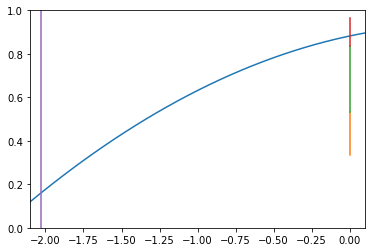

In [57]:
import matplotlib.pyplot as plt
import numpy as np

init_x = -2.1                  #m
init_y = 0.12                  #m
gravity = 9.8                  #m/s^2
initial_velocity = 8           #m/s
launch_angle = np.radians(30)  #radians

initial_velocity_x = initial_velocity*np.cos(launch_angle)
initial_velocity_y = initial_velocity*np.sin(launch_angle)

def x_pos(t):
    return (t*initial_velocity_x)+init_x

def y_pos(t):
    return (t*initial_velocity_y-0.5*gravity*t**2)+init_y

x = []
y = []

for t in range(0, 50): #0.5 seconds of travel, in hundredths of a second
    x.append(x_pos(t/100))
    y.append(y_pos(t/100))

plt.plot(x, y)
plt.xlim(init_x,0.1)
plt.ylim(0,1)

plt.plot([0,0],[0.333,0.533]) #low goal
plt.plot([0,0],[0.533,0.838]) #mid goal
plt.plot([0,0],[0.838,0.965]) #high goal
plt.plot([-2.03,-2.03],[0,1]) #shooting line

plt.show()

We now know that $8$ $\frac{m}{s}$ seems like a good initial velocity. 

This means that the outer edge of our wheel or belt must be moving at $8 \times 2 = 16 \frac{m}{s}$

If our wheel or belt is $0.1\:m$ in diameter, the circumference is $\pi \times 0.1 \approx .314m$

$\frac{16\:meters}{second} \times \frac{rotation}{0.314\:meters} \times \frac{60\:seconds}{minute} =  \frac{960\:rotations}{0.314\:minute}$

So our motor must be spinning at $\frac{960}{0.314} \approx 3057$ rpm





# Torque

According to [wikipedia](https://en.wikipedia.org/wiki/List_of_moments_of_inertia) the moment of inertia for a torus is $\frac{1}{4} m ( 4b^{2} + 3a^{2})$ where $a$ is the minor radius, $b$ is the major radius and $m$ is the mass

The mass of our ring is $0.03\:kg$ and the shape can be approximated as a torus with a major radius of $0.05\:m$ and minor radius of $0.011\:m$, so our moment of inertia is $\frac{1}{4} \times 0.03 ( 4 \times 0.05 ^{2} + 3 \times 0.011 ^{2}) \approx 0.0000777\: kg\:m^{2}$

The average accleration needed to go from $0\:\frac{m}{s}$ to $16\:\frac{m}{s}$ over one quarter of a 3057 rpm wheel is $\frac{16}{60\div3057\div4} \approx 3260.8\:\frac{m}{s^{2}}$ (note that this would decrease with a longer acceleration path such as a belt, multiple wheels, or a curved shooter)

So the torque required is $3260.8 \times 0.0000777 \approx 0.2533 \:Nm$

This is significant, more than twice as much as a Modern Robotics/MATRIX 1:1 motor can provide